# Autocorrelation Analysis of a Financial Asset

## Introduction
In this notebook, we will study the autocorrelation of the returns of a particular financial asset over different time periods: the last 12 months, last 6 months, and last 3 months. Autocorrelation is a measure that indicates the degree of similarity between a time series and a lagged version of itself. It is useful for identifying patterns and temporal dependencies in financial data.



## 1. Importing Necessary Libraries

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

## 2. Obtaining the Financial Asset Data

Let's choose an asset for analysis. In this case, we will use Apple Inc. (AAPL).

In [20]:
# Define the asset ticker
ticker = 'AAPL'

# Download the adjusted closing prices of the asset
prices = yf.download(ticker)['Adj Close'].tz_localize(None)

# View the last few rows of the data
prices.tail()

[*********************100%%**********************]  1 of 1 completed


Date
2024-09-06    220.820007
2024-09-09    220.910004
2024-09-10    220.110001
2024-09-11    222.660004
2024-09-12    222.770004
Name: Adj Close, dtype: float64

## 3. Calculating Daily Returns
To analyze autocorrelation, we will calculate the daily returns of the asset.

In [21]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# View the first few rows of the returns
returns.head()

Date
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024752
1980-12-18    0.028992
1980-12-19    0.061029
Name: Adj Close, dtype: float64

## 4. Autocorrelation Analysis Over Different Time Periods
We will analyze the autocorrelation of returns over the last 12 months, 6 months, and 3 months.

First, we will define the time periods.

In [22]:
# Get the current date
end_date = returns.index.max()

# Define periods
periods = {
    'Last 12 Months': end_date - pd.DateOffset(months=12),
    'Last 6 Months': end_date - pd.DateOffset(months=6),
    'Last 3 Months': end_date - pd.DateOffset(months=3)
}

### 4.1. Plotting the Autocorrelation Function
We will plot the autocorrelation functions for each period in subplots.

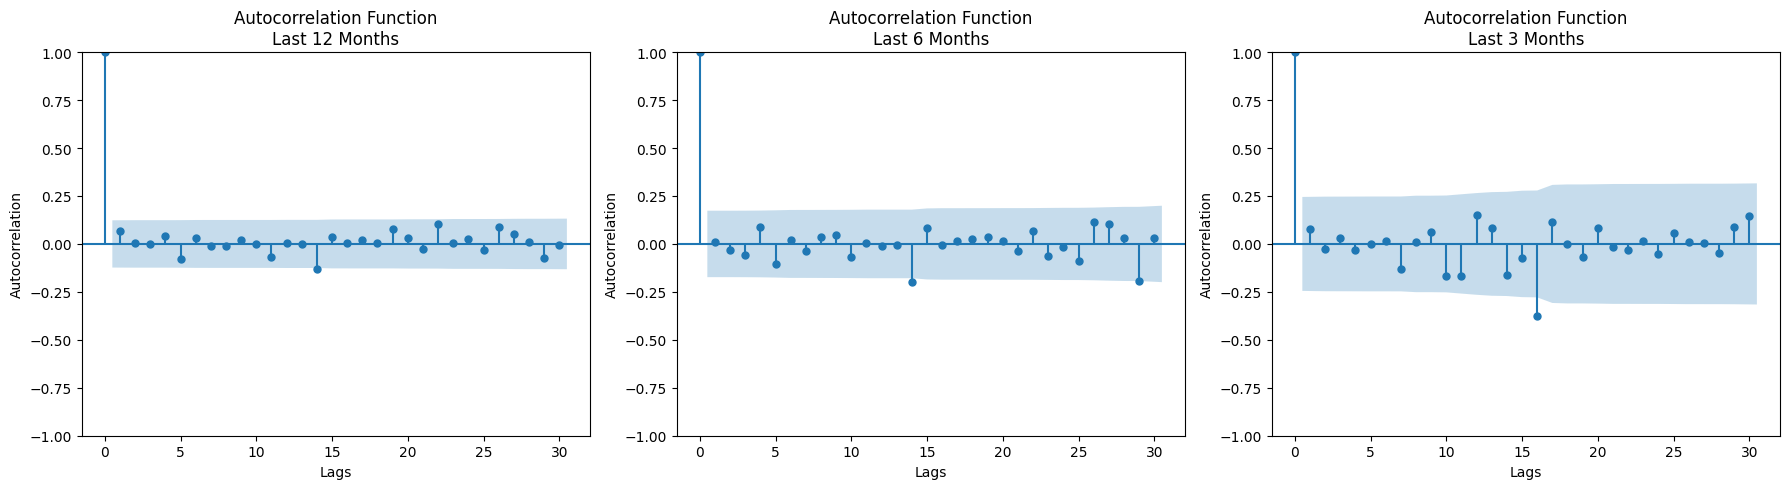

In [23]:
# Define the number of lags
num_lags = 30

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterate over periods and axes
for ax, (title, start_date) in zip(axes, periods.items()):
    # Slice the returns for the given period
    period_returns = returns.loc[start_date:end_date]

    # Plot the autocorrelation function
    plot_acf(period_returns, lags=num_lags, ax=ax)
    ax.set_title(f'Autocorrelation Function\n{title}')
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

### 4.2. Calculating Autocorrelation Coefficients
We will calculate the autocorrelation coefficients for each period.

In [24]:
# Initialize a dictionary to hold the autocorrelations
autocorr_dict = {}

# Calculate autocorrelations for each period
for title, start_date in periods.items():
    # Slice the returns for the given period
    period_returns = returns.loc[start_date:end_date]

    # Calculate autocorrelation coefficients
    autocorrelations = [period_returns.autocorr(lag=lag) for lag in range(1, num_lags+1)]

    # Store in the dictionary
    autocorr_dict[title] = autocorrelations

# Convert the dictionary to DataFrames for display
df_autocorr_12m = pd.DataFrame({'Lag': range(1, num_lags+1), 'Autocorrelation': autocorr_dict['Last 12 Months']})
df_autocorr_6m = pd.DataFrame({'Lag': range(1, num_lags+1), 'Autocorrelation': autocorr_dict['Last 6 Months']})
df_autocorr_3m = pd.DataFrame({'Lag': range(1, num_lags+1), 'Autocorrelation': autocorr_dict['Last 3 Months']})

# Join all dataframes into one
df_autocorr_all = pd.concat([df_autocorr_12m, df_autocorr_6m, df_autocorr_3m], axis=1)
df_autocorr_all.columns = ['Lag', 'Autocorrelation (12m)', 'Lag', 'Autocorrelation (6m)', 'Lag', 'Autocorrelation (3m)']

# Display the DataFrames
df_autocorr_all

,Lag,Autocorrelation (12m),Lag,Autocorrelation (6m),Lag,Autocorrelation (3m)
0,1,0.069851,1,0.008669,1,0.082444
1,2,0.005830,2,-0.031705,2,-0.029490
2,3,-0.000157,3,-0.059634,3,0.033629
3,4,0.043900,4,0.087535,4,-0.032915
4,5,-0.080528,5,-0.103756,5,-0.001042
5,6,0.028788,6,0.019214,6,0.017033
6,7,-0.011566,7,-0.036931,7,-0.145555
7,8,-0.010087,8,0.039048,8,0.011206
8,9,0.019771,9,0.048928,9,0.071764
9,10,-0.002005,10,-0.071262,10,-0.191889
